# Estructuras de datos en python

## Contenedores de datos en python

Pyton ofrece varias estructuras para el almacenamiento de datos, entre ellas tenemos 
* Tuplas *tuple*
* Listas *list*
* **Arreglos** *array*
* Diccionarios *dictionaries* 
* Marcos de datos *DataFrames*

### Areglos 

Los arreglos en Python se pueden entender como una variante de las listas con las siguientes supuestos y características: 

* Todos los elementos deben ser del mismo tipo 
* Se debe conocer el numero de elementos al crear el arreglo
* En el paquete básico (estandar) de Python hay un tipo de objeto llamado array, pero este no es eficiente para calculos matemáticos y por tanto no lo usaremos este curso. 
* Los arrays que usaremos en este curso será el definido en el paquete *Numerical Python*, a menudo aabreviado como **NumPy**. Este paquete debe estar instalado previamente y se carga con *import numpy*
* Con *numpy* se pueden llevar a cabo un amplio numero de opercaciones matemáticas sobre el arreglo completo, haceindo que no sea necesaria la necesidad del uso de loops sobre los elementos del arreglo. Esto se conoce como *vectorización*
* Los arreglos con un solo índice (o un indice unidimensional) se conocen como vectores. Arreglos con dos indices (o un indice bidimensional) se usan como una  eficiente estructura de tados y tablas. Los arreglos pueden terner tres o más indices.  



In [1]:
# Cargamos el paquete numpy 
import numpy as np
l2=[7,8,9] # se crea la lista l2 
# convertimos la lista l3 en un arreglo 
a=np.array(l2)
print(a,type(a))

[7 8 9] <class 'numpy.ndarray'>


Creamos un arreglo de $n$ ceros. 

In [3]:
n=5
b=np.zeros(n)
print(b)

[0. 0. 0. 0. 0.]


Generar un arreglo de ceros donde la longitud es la misma del vector a y el tipo de elemento es el mismo de a

In [4]:
c=np.zeros_like(a)
print(c)

[0 0 0]


La función *linespace* crea un arreglo con $n$ elementos con valores distribuidos uniformemente en el intervalo $[p,q]$   

In [5]:
a=np.linspace(0,5,15)
print(len(a))
print(a,type(a)) 

15
[0.         0.35714286 0.71428571 1.07142857 1.42857143 1.78571429
 2.14285714 2.5        2.85714286 3.21428571 3.57142857 3.92857143
 4.28571429 4.64285714 5.        ] <class 'numpy.ndarray'>


El código a[i:j:s] selecciona del arreglo a  los elementos iniciando en el indice i, saltando s indices pero no incluyendo el índice j  

In [6]:
a[1:8:2]

array([0.35714286, 1.07142857, 1.78571429, 2.5       ])

Todos menos el primero (a[0]) y el útimo (a[14])

In [7]:
a[1:-1]

array([0.35714286, 0.71428571, 1.07142857, 1.42857143, 1.78571429,
       2.14285714, 2.5       , 2.85714286, 3.21428571, 3.57142857,
       3.92857143, 4.28571429, 4.64285714])

In [8]:
b=a[1:-1]
b[0]

0.35714285714285715

Selecciona de 4 en cuatro hasta el final 

In [9]:
a[::4]

array([0.        , 1.42857143, 2.85714286, 4.28571429])

## Ejemplo

### Cálculo de coordenadas y valores de funciones  

Suponga que tenemos una función $f(x)$ y deseamos evaluar esta función en un conjunto de puntos $x$, $x_0, x_1, \ldots,x_{n-1}$. Podriamos organizar los $n$ pares $(x_i,f(x_i))$ en un arreglo. En este ejemplo $$f(x)=x^2\cos(x)\exp(x)+2$$.

Hay varias formas de llevar a cabo esta tarea con Python, aquí lo haremos de dos formas, una de las cuales ilustra el concepto de *vectorización*. 

In [10]:
# para tener disponibles las funciones coseno y exponencial 
from math import cos, exp
n=5
x=np.linspace(0,1,n)
print(x,type(x))
# definimos la función f
def f(x):
    return(x**2*cos(x)*exp(x)+2)
# creamos una lista y 
y=np.array( [f(i) for i in x ] )  # note el uso de for para crear la lista  
print(y,type(y))

[0.   0.25 0.5  0.75 1.  ] <class 'numpy.ndarray'>
[2.         2.07775676 2.36172226 2.87130426 3.46869394] <class 'numpy.ndarray'>


### Usando vectorización 

Definimos la función f2, que hace exactamente lo mismo que la función f anterior, pero note que aquí usamos las funciones cos y exp del paquete numpy (np.cos y np.exp) 

In [11]:
def f2(x):
    return(x**2*np.cos(x)*np.exp(x)+2)
y=f2(x)

print(y)

[2.         2.07775676 2.36172226 2.87130426 3.46869394]


Si se intenta hacer esto con la función f de la forma anterior nos da un error. La razón de esto es que las funciones de `numpy` soportan vectorización mientras que las de `math` no. `Numpy` implementa aritmetica de vectores para arrays de cualquier dimensión, por tanto proporciona sus propias versiones de funciones matematicas como `cos`, `sin`, `exp`, `log` etc, las cuales trabajan con arreglos como argumentos y aplican la función a cada elemento. Cuando una función de Python trabaja para un argumento array, se dice que la función está vectorizada. 

In [12]:
# Esto no trabaja porque f usa las funciones de math 
# que solo trabajan sobre elementos unidimensionales
# f(x) 

Si las expresiones matemáticas en la función $f$ involucran operaciones aritméticas básicas y funciones matemáticas del módulo `math`, $f$ quedará automáticamete vectorizada solo importando las funciones desde `numpy` en lugar de `math`. Sin embargo si las expresiones dentro de $f$ contienen la sentencia `if`, es necesario reescribir el código para que trabaje con arreglos.    

### Gráficas de funciones 

Suponga que deseamos graficar la función $f(x)$ para $a\leq x \leq b$. Primero escogemos $n$ $x-$cordenadas en el intervalo $[a , b]$, digamos $x_0, x_1, \ldots,x_{n-1}$, luego evaluamos $y_i=f(x_i)$ para $i=0, 1, \ldots, n-1$. Los puntos $(x_i,y_i)$ estarán sobre la curva $y=f(x)$. Normalmente escogemos las coordenadas $x_i$ igualmente espaciadas, si guardamos los valores $x_i$ e $y_i$ en dos arreglos `x` e `y`podemos graficar la curva con el comando `plot(x,y)`. 

#### Gráficas con Mathplotlib

El paquete estándar para graficar funciones en Python es `Mathplotlib`, primero daremos un ejemplo del uso de este en una sintaxis que paquete que es similar a la de `MATLAB`. 

Grafiquemos la curva $$y=t^2\exp(-t^2)$$ para valores de $t$ entre 0 y 3. Primero generamos valores $t$ igualmente espaciados para, en este caso 51 valores. Luego calculamos los correspondientes valores de $y$ en esos puntos   

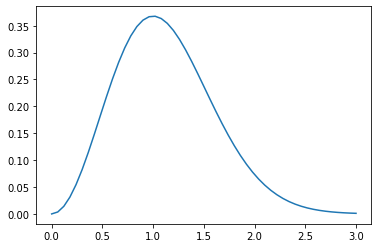

In [13]:
import numpy as np
# se define la función 
def f3(t):
    return t**2*np.exp(-t**2)
# se generan los valores de $t$
t=np.linspace(0,3,51)
# calcular los valores de f(t)
y=f3(t)
# importar el paquete para graficar 
from matplotlib.pyplot import *
plot(t,y)
show()

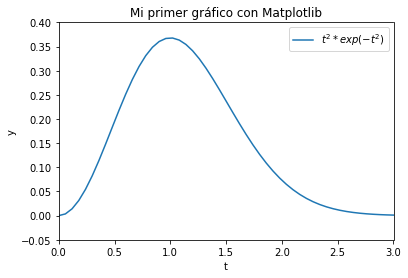

In [14]:
plot(t, y,label=r'$t^2*exp(-t^2)$')
xlabel('t')
ylabel('y')
legend(loc='best')
axis([0, 3, -0.05, 0.4]) # [tmin, tmax, ymin, ymax]
title('Mi primer gráfico con Matplotlib')
show()